In [1]:
import pandas as pd
import numpy as np

In [2]:
nomefile = './marziani.csv'
df = pd.read_csv(nomefile)
df.head()

specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65

In [3]:
print(df.columns)
print(df.dtypes)

Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


In [4]:
df['specie'].unique() #tutti i tipi di specie

array(['Robby', 'Simmy'], dtype=object)

In [5]:
df['specie'].describe() #info about object columns

count      2000
unique        2
top       Robby
freq       1000
Name: specie, dtype: object

In [6]:
df['colore'].describe()

count     1993
unique       3
top        blu
freq       674
Name: colore, dtype: object

In [7]:
df.colore.unique()

array(['viola', 'blu', 'rosso', nan], dtype=object)

In [8]:
df[df['specie'] == 'Simmy'].describe()

n_arti         peso     altezza   larghezza
count  995.000000  1000.000000  999.000000  998.000000
mean    24.544724     4.490280   32.769620   70.241653
std      2.883513     0.518585    5.755694    3.345319
min     20.000000     2.850000   15.630000   59.440000
25%     22.000000     4.147500   29.070000   68.000000
50%     25.000000     4.505000   32.640000   70.330000
75%     27.000000     4.850000   36.475000   72.610000
max     29.000000     6.110000   49.750000   80.260000

In [9]:
df[df['specie'] == 'Robby'].describe()

n_arti         peso     altezza   larghezza
count  999.000000  1000.000000  996.000000  999.000000
mean    24.637638     3.500900   17.518082   84.719429
std      2.899248     0.489139    4.227621   11.456814
min     20.000000     2.130000    3.170000   44.700000
25%     22.000000     3.170000   14.740000   77.045000
50%     25.000000     3.490000   17.330000   84.890000
75%     27.000000     3.830000   20.307500   92.510000
max     29.000000     5.050000   29.400000  117.450000

In [10]:
colori = np.sort(df['colore'].dropna().unique())

for i, col in enumerate(colori):
    df['colore'] = df['colore'].replace(col, i, inplace=True)

df.describe()

n_arti         peso      altezza    larghezza
count  1994.000000  2000.000000  1995.000000  1997.000000
mean     24.591274     3.995590    25.155318    77.484166
std       2.891055     0.706263     9.147702    11.119667
min      20.000000     2.130000     3.170000    44.700000
25%      22.000000     3.470000    17.330000    69.440000
50%      25.000000     3.990000    24.020000    73.550000
75%      27.000000     4.530000    32.645000    84.890000
max      29.000000     6.110000    49.750000   117.450000

In [11]:
import matplotlib.pyplot as pl
import numpy as np

dati_marziani = {'tipo'      : [],
                 'colore'    : [],
                 'n_arti'    : [],
                 'peso'      : [],
                 'altezza'   : [],
                 'larghezza' : []}
with open('./marziani.csv','r') as fp:
    for line in fp.readlines():
        ln = line[:-1].split(',')
        if ln[0] == 'specie': continue
        
        try:
            if " " not in ln and "" not in ln:
                dati_marziani['tipo'].append(ln[0])
                dati_marziani['colore'].append(ln[1])
                dati_marziani['n_arti'].append(float(ln[2]))
                dati_marziani['peso'].append(float(ln[3]))
                dati_marziani['altezza'].append(float(ln[4]))
                dati_marziani['larghezza'].append(float(ln[5]))
        except Exception as e:
            print(ln)
            raise(e)
for key in dati_marziani:
    dati_marziani[key] = np.array(dati_marziani[key])


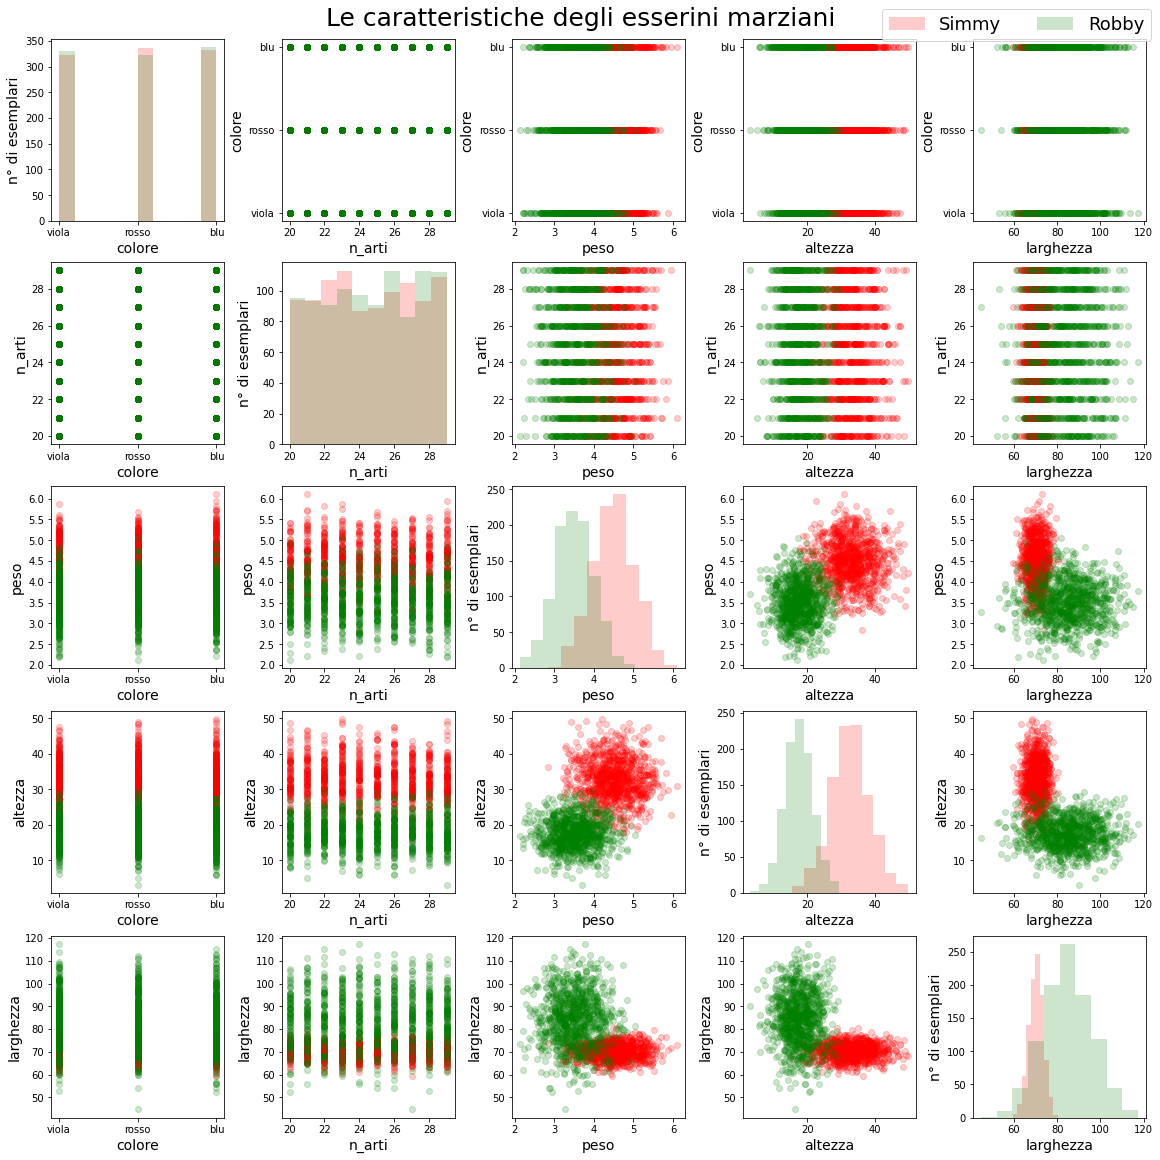

In [12]:
import numpy as np
import matplotlib.pyplot as plt
caratteristiche = ['colore', 'n_arti', 'peso', 'altezza', 'larghezza']
n = len(caratteristiche)
fig, axs = plt.subplots(n, n, figsize=(16,16), constrained_layout=True)
for j, dato_y in enumerate(caratteristiche):
    for i, dato_x in enumerate(caratteristiche):
        maschera_simmy = dati_marziani['tipo']=="Simmy"
        maschera_robby = dati_marziani['tipo']=="Robby"
        if i!=j:
            axs[j,i].scatter(dati_marziani[dato_x][maschera_simmy], 
                       dati_marziani[dato_y][maschera_simmy], c="r", label="Simmy", alpha = 0.2)
            axs[j,i].scatter(dati_marziani[dato_x][maschera_robby], 
                       dati_marziani[dato_y][maschera_robby], c="g", label="Robby", alpha = 0.2)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel(dato_y, fontsize=14)
        else:
            axs[j,i].hist(dati_marziani[dato_x][maschera_simmy], bins=10,
                        color="r", label="Simmy", alpha=0.2)
            axs[j,i].hist(dati_marziani[dato_x][maschera_robby], bins=10,
                        color="g", label="Robby", alpha=0.2)
            axs[j,i].set_xlabel(dato_x, fontsize=14)
            axs[j,i].set_ylabel("n° di esemplari", fontsize=14)
    
fig.suptitle('Le caratteristiche degli esserini marziani', fontsize=25)
fig.legend(labels=["Simmy","Robby"], ncol=2, fontsize=18)
plt.show()

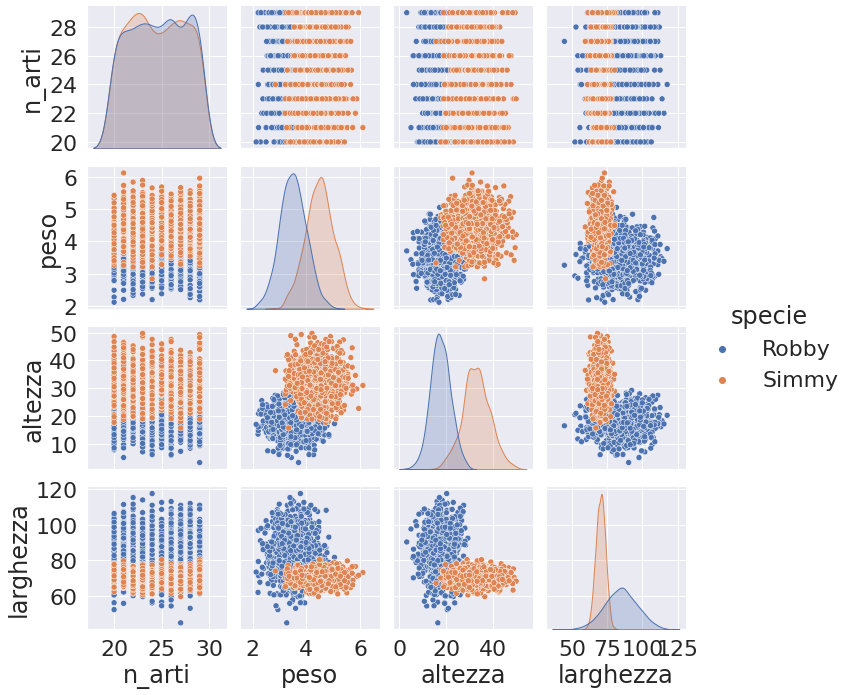

In [13]:
import seaborn as sns

d = pd.read_csv('./marziani.csv')
sns.set_theme(font_scale=2)
sns.pairplot(d, hue='specie')
sns.set()

In [14]:
cols_with_missing = [col for col in d.columns if d[col].isnull().sum() > 0]
print(cols_with_missing)
cols_selected = ['peso', 'altezza', 'larghezza']

['colore', 'n_arti', 'altezza', 'larghezza']


In [15]:
d = d.dropna(axis='index', subset = cols_selected)
d.shape

(1992, 6)

In [16]:
X = d[cols_selected]
y = d['specie']
print(X.head())
print(y.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.head())
print("Numero di campioni in X train ", X_train.shape[0])
print(y_train.value_counts())
print(y_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X train  1394
Simmy    710
Robby    684
Name: specie, dtype: int64
1853    Simmy
486     Robby
846     Robby
376     Robby
580     Robby
Name: specie, dtype: object


# Standardizzazione

In [18]:
m = X_train.mean()
s = X_train.std()

pd.options.display.float_format = '{: .3f}'.format

Z = (X_train - m) / s
Z.std()

peso         1.000
altezza      1.000
larghezza    1.000
dtype: float64

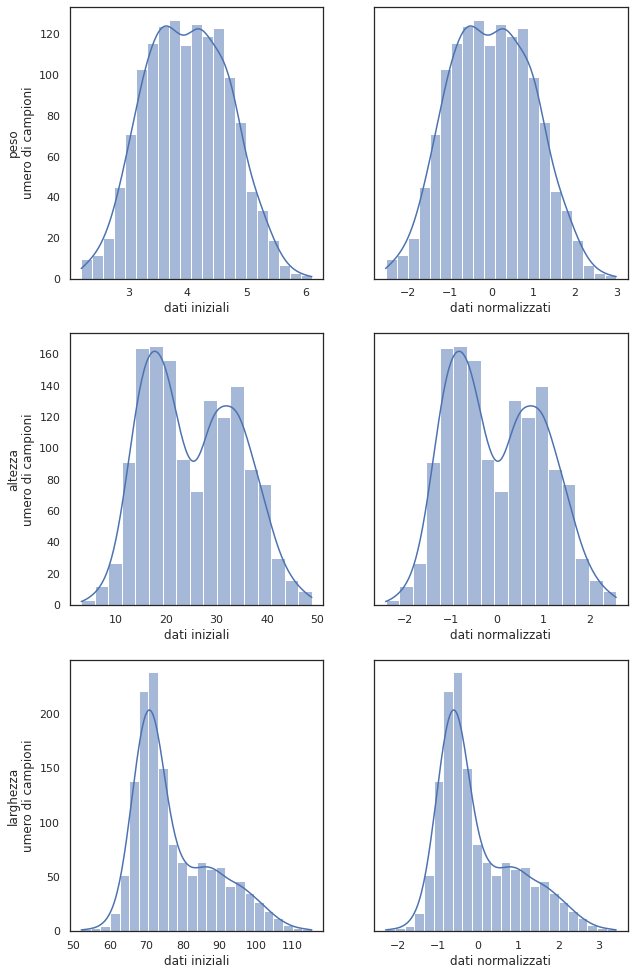

In [19]:
sns.set_style("white")
fig, axes = plt.subplots(3, 2, figsize=(10,17), sharey="row")

for i, ax in enumerate(axes):
    col = cols_selected[i]
    
    ax[0].set_xlabel("dati iniziali")
    ax[1].set_xlabel("dati normalizzati")
    ax[0].set_ylabel(col + "\numero di campioni")
    
    sns.histplot(ax=ax[0], x = X_train[col], kde=True)
    sns.histplot(ax=ax[1], x = Z[col], kde=True)

sns.set()

Fare l'addestramento per i marziani con un numero di epoche ottimale (115) Crea un notebook in cui carichi il dataset dell’Iris con le due istruzioni: from sklearn import datasets iris = datasets.load_iris()

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

›› Analizza le statistiche delle varie colonne presenti.

In [21]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              5.100             3.500              1.400             0.200   
1              4.900             3.000              1.400             0.200   
2              4.700             3.200              1.300             0.200   
3              4.600             3.100              1.500             0.200   
4              5.000             3.600              1.400             0.200   

   target  
0   0.000  
1   0.000  
2   0.000  
3   0.000  
4   0.000

 ›› Verifica le relazioni presenti tra le diverse feature utilizzando la funzione pairplot()di seaborn. Indica quali caratteristiche sono più significative

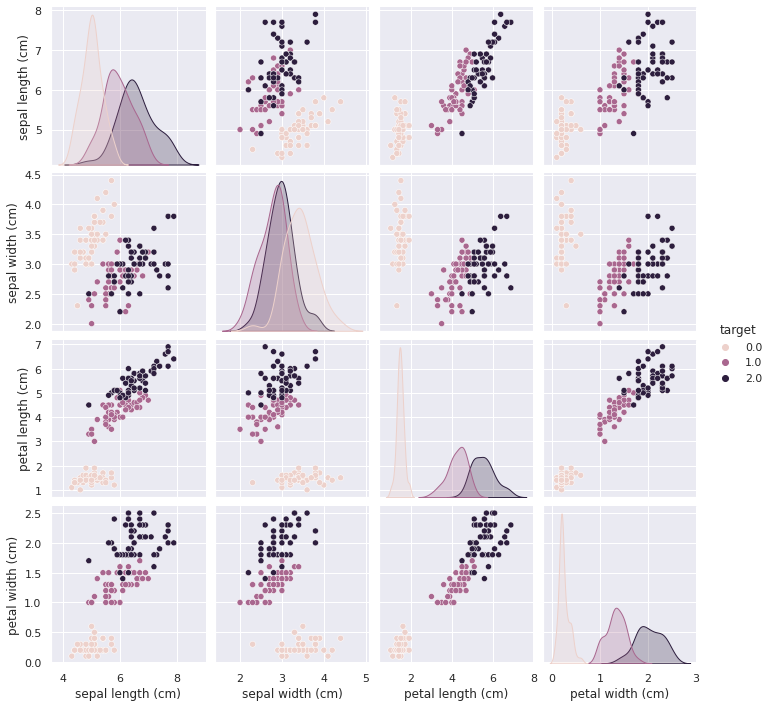

In [22]:
sns.set_theme(font_scale=1)
sns.pairplot(df,hue='target')
sns.set()

 ›› Effettua la standardizzazione delle feature. 

In [23]:
columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
m = df[columns].mean()
s = df[columns].std()

pd.options.display.float_format = '{: .3f}'.format

Z = (df[columns] - m) / s
Z.std()

sepal length (cm)    1.000
sepal width (cm)     1.000
petal length (cm)    1.000
petal width (cm)     1.000
dtype: float64

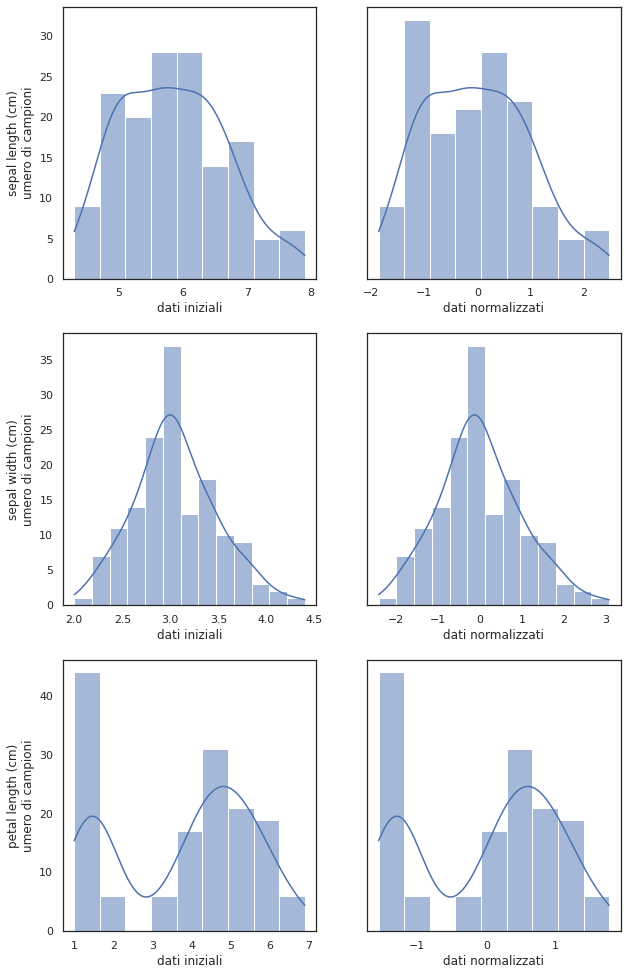

In [24]:
sns.set_style("white")
fig, axes = plt.subplots(3, 2, figsize=(10,17), sharey="row")

for i, ax in enumerate(axes):
    col = columns[i]
    
    ax[0].set_xlabel("dati iniziali")
    ax[1].set_xlabel("dati normalizzati")
    ax[0].set_ylabel(col + "\numero di campioni")
    
    sns.histplot(ax=ax[0], x = df[col], kde=True)
    sns.histplot(ax=ax[1], x = Z[col], kde=True)

sns.set()

 ›› Fai la suddivisione dei dati in due dataset: uno di training e uno di test. Quanti campioni contengono?

In [26]:
X, y = df[columns], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(f"numero campioni di training: {X_train.shape[0]}\nnumero campioni di test: {X_test.shape[0]}")

numero campioni di training: 105
numero campioni di test: 45
